In [6]:
from bigml.api import BigML


api = BigML(project="project/5d94a3525a213962e20002f5") # AUTH dans docker/auth.env
# train_set
train_dataset = api.get_dataset('dataset/5db9ab467811dd0554000ec0')

# Tous les modeles #####
# # Ensemble #####
# ensemble_10 = api.get_ensemble('ensemble/5dbc189a7811dd055c00146b')
# ensemble_20 = api.get_ensemble('ensemble/5dbc192d5299631c8200e464')
# ensemble_30 = api.get_ensemble('ensemble/5dbc19b27811dd7f2d00db91')
# ensemble_40 = api.get_ensemble('ensemble/5dbc1a555299631c8200e470')
# ensemble_50 = api.get_ensemble('ensemble/5dbc1b83e47684746800edce')
# ensemble_60 = api.get_ensemble('ensemble/5dbc1c505299631c8200e49d')
# ensemble_70 = api.get_ensemble('ensemble/5dbc1d305299631c8200e4bb')
# ensemble_80 = api.get_ensemble('ensemble/5dbc1df4e47684746800edf0')
# ensemble_90 = api.get_ensemble('ensemble/5dbc1e975299631c8200e4cd')
# ensemble_100 = api.get_ensemble('ensemble/5dbc1f645299631c8200e4e2')

# # Deepnet #####

# deepnet_10 = api.get_deepnet('deepnet/5dbc189b5299631c8200e458')
# deepnet_20 = api.get_deepnet('deepnet/5dbc192ee47684746800edb8')
# deepnet_30 = api.get_deepnet('deepnet/5dbc19b4e47684746800edbb')
# deepnet_40 = api.get_deepnet('deepnet/5dbc1a577811dd7f2d00db9d')
# deepnet_50 = api.get_deepnet('deepnet/5dbc1b855299631c8200e47f')
# deepnet_60 = api.get_deepnet('deepnet/5dbc1c527811dd7f2d00dbb8')
# deepnet_70 = api.get_deepnet('deepnet/5dbc1d317811dd7f2d00dbbb')
# deepnet_80 = api.get_deepnet('deepnet/5dbc1df67811dd05570013b7')
# deepnet_90 = api.get_deepnet('deepnet/5dbc1e99e47684740500091a')
# deepnet_100 = api.get_deepnet('deepnet/5dbc1f66e47684746800ee02')


ensemble_list = [api.get_ensemble('ensemble/5dbc189a7811dd055c00146b'),
                api.get_ensemble('ensemble/5dbc192d5299631c8200e464'),
                api.get_ensemble('ensemble/5dbc19b27811dd7f2d00db91'),
                api.get_ensemble('ensemble/5dbc1a555299631c8200e470'),
                api.get_ensemble('ensemble/5dbc1b83e47684746800edce'),
                api.get_ensemble('ensemble/5dbc1c505299631c8200e49d'),
                api.get_ensemble('ensemble/5dbc1d305299631c8200e4bb'),
                api.get_ensemble('ensemble/5dbc1df4e47684746800edf0'),
                api.get_ensemble('ensemble/5dbc1e975299631c8200e4cd'),
                api.get_ensemble('ensemble/5dbc1f645299631c8200e4e2')       
                ]

deepnet_list = [api.get_deepnet('deepnet/5dbc189b5299631c8200e458'),
                api.get_deepnet('deepnet/5dbc192ee47684746800edb8'),
                api.get_deepnet('deepnet/5dbc19b4e47684746800edbb'),
                api.get_deepnet('deepnet/5dbc1a577811dd7f2d00db9d'),
                api.get_deepnet('deepnet/5dbc1b855299631c8200e47f'),
                api.get_deepnet('deepnet/5dbc1c527811dd7f2d00dbb8'),
                api.get_deepnet('deepnet/5dbc1d317811dd7f2d00dbbb'),
                api.get_deepnet('deepnet/5dbc1df67811dd05570013b7'),
                api.get_deepnet('deepnet/5dbc1e99e47684740500091a'),
                api.get_deepnet('deepnet/5dbc1f66e47684746800ee02')          
               ]

dataset_list = [api.get_dataset('dataset/5dbc18885299631c8200e455'),
                api.get_dataset('dataset/5dbc19115299631c8200e461'),
                api.get_dataset('dataset/5dbc19995299631c8200e46d'),
                api.get_dataset('dataset/5dbc1a237811dd7f2d00db9a'),
                api.get_dataset('dataset/5dbc1acfe47684746800edc5'),
                api.get_dataset('dataset/5dbc1c105299631c8200e494'),
                api.get_dataset('dataset/5dbc1cdc5299631c8200e4af'),
                api.get_dataset('dataset/5dbc1dd37811dd7f2d00dbd0'),
                api.get_dataset('dataset/5dbc1e7ae47684749e000f78'),
                api.get_dataset('dataset/5dbc1f3c7811dd7f2d00dbe8')
               ]




In [7]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from bigml.api import BigML

# x % of data - train_set
# y nom du modele


def data_auc(x,y):
    
    # on a tous les modeles entrainés ( deepnet - ensemble ) sur les n% du train_set 
    # batch prediction sur le train_set entier 
    # auc
    
    batch_path_ens  = f"files_csv_perf_train/GiveMeCredit_Review_Ensemble_Train{x}.csv"
    batch_path_deep  = f"files_csv_perf_train/GiveMeCredit_Review_Deepnet_Train{x}.csv"
    
    # Récupération des batchs prédiction Ensemble - Deepnet 

    batch_prediction_ens = api.create_batch_prediction(ensemble_list[y], dataset_list[y],{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction_ens)
    api.download_batch_prediction(batch_prediction_ens,filename=batch_path_ens)
    
    print(f"batch prédiction {x} % du train_set - Ensemble")
    
    batch_prediction_deep = api.create_batch_prediction(deepnet_list[y], dataset_list[y],{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction_deep)
    api.download_batch_prediction(batch_prediction_deep,filename=batch_path_deep)
    
    print(f"batch prédiction {x} % du train_set - Deepnet")
    
    # AUC 

    df_ens = pd.read_csv(batch_path_ens, index_col=0)
    df_deep = pd.read_csv(batch_path_deep, index_col=0)

    actual_ens = df_ens['SeriousDlqin2yrs']
    scores_ens = df_ens['1 probability']
    auc_ens = roc_auc_score(actual_ens, scores_ens)
    
    actual_deep = df_deep['SeriousDlqin2yrs']
    scores_deep = df_deep['1 probability']
    auc_deep = roc_auc_score(actual_deep, scores_deep)
    
    
    return auc_ens , auc_deep
      

batch prédiction 10 % du train_set - Ensemble
batch prédiction 10 % du train_set - Deepnet
batch prédiction 20 % du train_set - Ensemble
batch prédiction 20 % du train_set - Deepnet
batch prédiction 30 % du train_set - Ensemble
batch prédiction 30 % du train_set - Deepnet
batch prédiction 40 % du train_set - Ensemble
batch prédiction 40 % du train_set - Deepnet
batch prédiction 50 % du train_set - Ensemble
batch prédiction 50 % du train_set - Deepnet
batch prédiction 60 % du train_set - Ensemble
batch prédiction 60 % du train_set - Deepnet
batch prédiction 70 % du train_set - Ensemble
batch prédiction 70 % du train_set - Deepnet
batch prédiction 80 % du train_set - Ensemble
batch prédiction 80 % du train_set - Deepnet
batch prédiction 90 % du train_set - Ensemble
batch prédiction 90 % du train_set - Deepnet
batch prédiction 100 % du train_set - Ensemble
batch prédiction 100 % du train_set - Deepnet


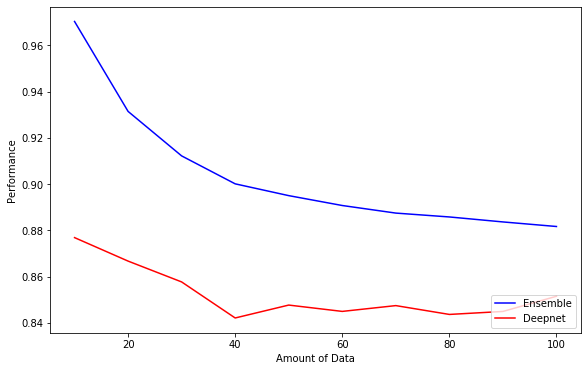

In [8]:
import matplotlib.pyplot as plt

x = 10
y = 0
auc_list_ens = []
auc_list_deep = []
data_amount_list = []
while x <= 100 and y <= 9 :
    auc_ens , auc_deep = data_auc(x,y)
    auc_list_ens.append(auc_ens)
    auc_list_deep.append(auc_deep)
    data_amount_list.append(x)
    x += 10
    y += 1
    
plt.rcParams['figure.figsize'] = [9.5 , 6]
plt.xlabel("Amount of Data")
plt.ylabel("Performance")
plt.plot(data_amount_list,auc_list_ens, color="blue", label='Ensemble')
plt.plot(data_amount_list,auc_list_deep, color="red", label='Deepnet')
plt.legend(loc="lower right")
plt.show()
